<span style="color:red;  font-weight:bold; font-size:180%">  Casts and Dogs 인식을 위한 CNN 딥러닝 </span>    
#### <span style="color:red;  font-weight:bold; font-size:180%">  ●딥러닝을 위한 사전 준비 </span> 

<span style="color:blue;  font-weight:bold; font-size:180%">  1) 라이브러리 임포트 하기 </span> 

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # 이미지 전처리 과정 수행 
from keras.preprocessing.image import * 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.font_manager 
import random
import pandas as pd

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


<span style="color:blue;  font-weight:bold; font-size:180%">  2) 이미지 데이터셋이 있는 디렉토리 열결 후, 파일명 기반으로 0또는 1로 레이블링 하기 </span> 

In [22]:
path = 'C:/ai/2021_AI/coffee/normal coffee/'

In [23]:
path

'C:/ai/2021_AI/coffee/normal coffee/'

In [24]:
filenames = os.listdir(path)
print('●len(filenames) : ', len(filenames))
#print(filenames)

●len(filenames) :  488


In [25]:
type(filenames)

list

In [26]:
# 준비된 이미지 데이터셋 2000개 중에서 고양이는 0, 개는 1로 구성된 리스트 생성

categories=[]
for filename in filenames:
    #print(filename)
    #category = filename.split(" ")
    category = filename.split(" ")[0]
    #print(category)
    
    if category == 'nomal_coffee':
        categories.append(0)
    else:
        categories.append(1)

In [27]:
len(categories)

488

In [28]:
print(categories)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
df = pd.DataFrame({"filename" : filenames, "label" : categories})

In [30]:
df

,filename,label
0,nomal_coffee (1).jpg,0
1,nomal_coffee (10).jpg,0
2,nomal_coffee (100).jpg,0
3,nomal_coffee (101).jpg,0
4,nomal_coffee (102).jpg,0
...,...,...
483,Spilling coffee (484).jpg,1
484,Spilling coffee (485).jpg,1
485,Spilling coffee (486).jpg,1
486,Spilling coffee (487).jpg,1


In [31]:
print(df.filename)
print('-'*50)
print(df.label)

0           nomal_coffee (1).jpg
1          nomal_coffee (10).jpg
2         nomal_coffee (100).jpg
3         nomal_coffee (101).jpg
4         nomal_coffee (102).jpg
                 ...            
483    Spilling coffee (484).jpg
484    Spilling coffee (485).jpg
485    Spilling coffee (486).jpg
486    Spilling coffee (487).jpg
487    Spilling coffee (488).jpg
Name: filename, Length: 488, dtype: object
--------------------------------------------------
0      0
1      0
2      0
3      0
4      0
      ..
483    1
484    1
485    1
486    1
487    1
Name: label, Length: 488, dtype: int64


<span style="color:blue;  font-weight:bold; font-size:180%">  3) 준비된 이미지 분포 시각화하여 확인하기 </span> 

<IPython.core.display.Javascript object>


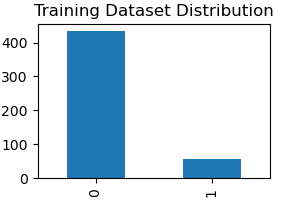

Text(0.5, 1.0, 'Training Dataset Distribution')

In [32]:
%matplotlib notebook
plt.figure(figsize=(3,2))
df['label'].value_counts().plot.bar()
plt.title("Training Dataset Distribution")

In [33]:
font_path = "C:\\Windows\\Fonts\\gulim.ttc"  # 한글 폰트 셋팅
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=6)

<IPython.core.display.Javascript object>


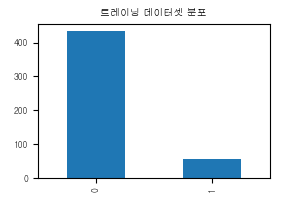

Text(0.5, 1.0, '트레이닝 데이터셋 분포')

In [34]:
plt.figure(figsize=(3,2))
df['label'].value_counts().plot.bar()
plt.title("트레이닝 데이터셋 분포")

<span style="color:blue;  font-weight:bold; font-size:180%">  4) 준비된 이미지 랜덤으로 선택하여 시각화해보기 </span> 

In [35]:
#type(filenames)
sample = random.choice(filenames) # random.choice() 함수는 리스트에서 임의의 요소를 선택
print(sample)

nomal_coffee (73).jpg


In [36]:
print(path+sample)

C:/ai/2021_AI/coffee/normal coffee/nomal_coffee (73).jpg


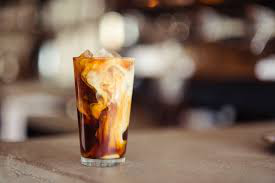

In [37]:
load_img(path+sample)

<IPython.core.display.Javascript object>


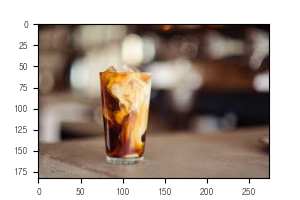

In [38]:
imge = load_img(path+sample)
plt.figure(figsize=(3,2))
plt.imshow(imge)

<span style="color:red;  font-weight:bold; font-size:180%">  ●딥러닝 시작 </span> 

<span style="color:blue;  font-weight:bold; font-size:150%">  1) 이미지 사이즈 128x128 균일화를 옵션 셋팅 </span> 

In [39]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

<span style="color:blue;  font-weight:bold; font-size:150%">  2) 레이블링 결과를 0 or 1 에서 스트링 형태로 변형하기 </span> 

In [40]:
df['label']#현재 레이블링 결과

0      0
1      0
2      0
3      0
4      0
      ..
483    1
484    1
485    1
486    1
487    1
Name: label, Length: 488, dtype: int64

In [41]:
df['label'] = df['label'].replace({0 : 'cat', 1 : 'dog'})

In [42]:
df

,filename,label
0,nomal_coffee (1).jpg,cat
1,nomal_coffee (10).jpg,cat
2,nomal_coffee (100).jpg,cat
3,nomal_coffee (101).jpg,cat
4,nomal_coffee (102).jpg,cat
...,...,...
483,Spilling coffee (484).jpg,dog
484,Spilling coffee (485).jpg,dog
485,Spilling coffee (486).jpg,dog
486,Spilling coffee (487).jpg,dog


<span style="color:blue;  font-weight:bold; font-size:150%">  3) Tensorboard 출력을 위한 딥러닝 모델링 </span> 

<참고>  
"학습하는 과정 자체를 전체적으로 안정화"하여 학습 속도를 가속 시킬 수 있는 근본적인 방법인  
"배치 정규화(Batch Normalization)"를 사용하는 것이 좋다.  


● 배치정규화(Batch Normalization)  
신경망 입력 데이터를 평균 : 0 , 분산: 1로 정규화를 해서 학습이 잘 이루어지도록 하는 방법  
학습시 배치를 한 단위로 정규화를 한다.  

먼저 Input으로 사용된 배치의 평균과 분산을 계산을 한다.  
그 다음 hidden layer의 활성화값/출력값에 대해서 평균이 0, 분산이 1이 되도록 정규화(Normalization)를 한다.   
그럼으로써 데이터 분포가 덜 치우치게 되고 배치 정규화 단계마다 확대scale와 이동shift 변환(transform)을 수행한다.  


In [43]:
# Layer 1    tensorboard로 실행시 tf.부터 시작해야함.
model = tf.keras.models.Sequential([ 
tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH , IMAGE_CHANNEL)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),

# Layer 2 
tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),

# Layer 3
tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
tf.keras.layers.Dropout(0.25),
          
# Fully Connected 
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Dense(2,activation="softmax")])


<span style="color:blue;  font-weight:bold; font-size:150%">  4) 딥러닝 모델 컴파일 </span> 

<참고>  
● 케라스에서 binary_crossentropy와 categorical_crossentropy의 차이

● binary_crossentropy  
최종 출력 비트가 딱 1개로 구성된 경우 사용한다.   
가령, 최종 출력 값이 딱 1개의 비트로 구성된  [0] or [1] 이면서  
sigmoid_cross_entropy를 loss로 하고자 할 때는 binary_crossentropy를 사용한다.  

● categorical_crossentropy  
최종 출력 비트가 2개 이상으로 구성된 경우 사용한다.  
가령, 최종 출력 값이  [0,1] or [1,0] 의 원-핫인코딩 형태이면서  
softmax_cross_entropy를 loss로 하고자 할 때는 categorical_crossentropy를 사용한다. 

In [44]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

<span style="color:blue;  font-weight:bold; font-size:150%">  5) 콜백 함수를 활용한 딥러닝 옵션 추가하기 </span>

# 5.1) TensorBoard 결과를 기록할 로그 디렉토리 생성

In [52]:
import tensorboard

In [53]:
from datetime import datetime

In [54]:
earlystop = EarlyStopping(patience=10)

In [55]:
datetime.now()

datetime.datetime(2021, 7, 7, 13, 18, 11, 830734)

In [56]:
datetime.now().strftime("%Y%m%d-%H%M%S") 

'20210707-131812'

In [57]:
logdir="logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S") # 현재 날짜 및 시각으로 디렉토리 이름으로 로그 디렉토리 생성 

In [58]:
logdir

'logs\\20210707-131812'

In [59]:
os.getcwd()

'C:\\ai\\2021_AI\\coffee'

### ModelCheckpoint( ) 함수를 이용하여 지정된 폴더에 모델 업데이트 과정을 저장을 위한 부분 

In [60]:
# epoch마다 딥러닝 모델을 저장할 폴더 만들기
MODEL_DIR = './coffee_model_save/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [61]:
modelpath="./coffee_model_save/{epoch:02d}-{loss:.4f}.hdf5"  

In [62]:
modelpath

'./coffee_model_save/{epoch:02d}-{loss:.4f}.hdf5'

In [63]:
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', save_weights_only=True, 
                               verbose=1, save_best_only=True)

# 5.2) 콜백 함수 활용

In [166]:
os.getcwd()

'C:\\ai\\2021_AI\\coffee'

In [64]:
#텐서보드 콜백함수 사용 예시 

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [65]:
#EarlyStopping 콜백함수 사용 예시 

earlystop = EarlyStopping(patience=10)

<참고>   
ReduceLROnPlateau()함순 learning rate(학습률)이 개선되지 않을 때, 아래의 예시와 같이 learning rate(학습률)을 동적으로 조정할 수 있다.  

예시)   
learning_rate_reduction=ReduceLROnPlateau(  
monitor= 'val_loss',<span style="color:blue;  font-weight:bold; font-size:100%"> #'val_loss'를 모니터링하면서</span>     
patience = 2,<span style="color:blue;  font-weight:bold; font-size:100%"> #2회 이상 val_loss가 줄어들지 않으면</span>   
factor = 0.5,<span style="color:blue;  font-weight:bold; font-size:100%"> #learning rate을 1/2로 줄인다.</span>    
min_lr=0.0001,<span style="color:blue;  font-weight:bold; font-size:100%"> #learning rate의 하한선 0.0001로 지정 </span>  
verbose=1)  


In [66]:
# ReduceLROnPlateau 콜백함수 사용 예시 

learning_rate_reduction=ReduceLROnPlateau(
                        monitor= 'val_loss', #'val_loss'를 모니터링하면서
                        patience = 2, #2회 이상 val_loss가 줄어들지 않으면
                        factor = 0.5, #learning rate을 1/2로 줄인다.
                        min_lr=0.0001, #learning rate의 하한선 0.0001로 지정
                        verbose=1)

In [67]:
callbacks = [tensorboard_callback, checkpointer, earlystop, learning_rate_reduction]  #케라스에서 제공하는 콜백함수 사용

In [68]:
callbacks

In [70]:
type(callbacks)

list

<span style="color:blue;  font-weight:bold; font-size:150%">  6) 준비된 training 데이터셋을 학습용 데이터셋과 검증용 데이터셋으로 분리하기 </span>

### ● 판다스 기반의 데이터셋을 랜덤으로 분리(80% : 학습용, 20% : 검증용)

In [71]:
df

,filename,label
0,nomal_coffee (1).jpg,cat
1,nomal_coffee (10).jpg,cat
2,nomal_coffee (100).jpg,cat
3,nomal_coffee (101).jpg,cat
4,nomal_coffee (102).jpg,cat
...,...,...
483,Spilling coffee (484).jpg,dog
484,Spilling coffee (485).jpg,dog
485,Spilling coffee (486).jpg,dog
486,Spilling coffee (487).jpg,dog


In [72]:
train_df, validate_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [73]:
train_df

,filename,label
415,nomal_coffee (83).jpg,cat
314,nomal_coffee (382).jpg,cat
25,nomal_coffee (121).jpg,cat
222,nomal_coffee (3).jpg,cat
298,nomal_coffee (368).jpg,cat
...,...,...
106,nomal_coffee (195).jpg,cat
270,nomal_coffee (342).jpg,cat
348,nomal_coffee (412).jpg,cat
435,Spilling coffee (436).jpg,dog


In [74]:
validate_df

,filename,label
72,nomal_coffee (164).jpg,cat
244,nomal_coffee (319).jpg,cat
437,Spilling coffee (438).jpg,dog
79,nomal_coffee (170).jpg,cat
402,nomal_coffee (71).jpg,cat
...,...,...
220,nomal_coffee (298).jpg,cat
227,nomal_coffee (303).jpg,cat
324,nomal_coffee (391).jpg,cat
398,nomal_coffee (68).jpg,cat


### ● 좌측에 순차적인 인덱스 번호 추가해서 출력해보기

In [75]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [76]:
train_df

,filename,label
0,nomal_coffee (83).jpg,cat
1,nomal_coffee (382).jpg,cat
2,nomal_coffee (121).jpg,cat
3,nomal_coffee (3).jpg,cat
4,nomal_coffee (368).jpg,cat
...,...,...
385,nomal_coffee (195).jpg,cat
386,nomal_coffee (342).jpg,cat
387,nomal_coffee (412).jpg,cat
388,Spilling coffee (436).jpg,dog


### ● 학습용 및 검증용 데이터 전체 검토하기

In [77]:
print("전체 이미지 데이터 개수 : ", len(df))
print("학습용 전체 이미지 데이터 개수 : ", len(train_df))
print("검증용 전체 이미지 데이터 개수 : ", len(validate_df))

전체 이미지 데이터 개수 :  488
학습용 전체 이미지 데이터 개수 :  390
검증용 전체 이미지 데이터 개수 :  98


In [78]:
print("학습용 전체 이미지 데이터 개수 : ", len(train_df))
train_df['label'].value_counts()

학습용 전체 이미지 데이터 개수 :  390


cat    347
dog     43
Name: label, dtype: int64

In [79]:
print("검증용 전체 이미지 데이터 개수 : ", len(validate_df))
validate_df['label'].value_counts()

검증용 전체 이미지 데이터 개수 :  98


cat    86
dog    12
Name: label, dtype: int64

<span style="color:blue;  font-weight:bold; font-size:150%">  7) 이미지 재생성하여 데이터셋 증식하기 </span>

< 데이터 증식>

- 과적합은 학습할 샘플이 너무 적어 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문에 발생  
- 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 모델이 학습할 수 있을 것이다.  
- 데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법이다.  
- 이 방법은 그럴듯한 이미지를 생성하도록 여러 가지 랜덤한 변환을 적용하여 샘플을 늘리는 방식을 취하고 있다.  

<span style="color:blue;  font-weight:bold; font-size:120%">  7.1) 준비된 training 데이터셋을 기반으로 이미지 재생성하기 </span>

In [80]:
train_df.shape

(390, 2)

In [81]:
total_train = train_df.shape[0]

In [82]:
total_train

390

In [83]:
validate_df.shape

(98, 2)

In [84]:
total_validate = validate_df.shape[0]

In [85]:
total_validate

98

In [86]:
batch_size = 15

<span style="color:blue;  font-weight:bold; font-size:120%"> Step 1 : ImageDataGenerator 사용하기 </span>

### ● ImageDataGenerator 클래스 설명    
https://keras.io/ko/preprocessing/image/

<참고>  

▶rotation_range: 정수. 무작위 회전의 각도 범위입니다.    

▶rescale: 크기 재조절 인수. 디폴트 값은 None입니다.  
None 혹은 0인 경우 크기 재조절이 적용되지 않고,  
그 외의 경우 (다른 변형을 전부 적용한 후에) 데이터를 주어진 값으로 곱합니다.    

▶shear_range: 부동소수점. 층밀리기의 강도입니다. (도 단위의 반시계 방향 층밀리기 각도) 

▶zoom_range: 부동소수점 혹은 [하한, 상산]. 무작위 줌의 범위입니다.  
부동소수점인 경우, [하한, 상한] = [1-zoom_range, 1+zoom_range]입니다.

▶horizontal_flip: 불리언. 인풋을 무작위로 가로로 뒤집습니다.

▶width_shift_range: 부동소수점, 1D 형태의 유사배열 혹은 정수

▶height_shift_range: 부동소수점, 1D 형태의 유사배열 혹은 정수


In [87]:
# 학습용 이미지 데이터 생성기 셋팅 
train_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,  #0~1 사이로 변경 
        shear_range=0.1,  #반시계방향 
        zoom_range=0.2,   # 확대축소 20%
        horizontal_flip=True,   # 좌우반전 True
        width_shift_range=0.1,    # 좌우이동 10%
        height_shift_range=0.1)    # 상하이동 10%

In [88]:
train_datagen

In [89]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

<span style="color:blue;  font-weight:bold; font-size:120%"> Step 2 : flow_from_dataframe 사용하기 </span>


In [90]:
#train_df

### ● flow_from_dataframe  클래스 사용 전 현재 상태 확인하기 

In [91]:
#flow_from_dataframe 클래스 사용전 현재 학습용 데이터셋 상태 확인

print("-"*20, "train_df", "-"*20)
print(train_df)

print("-"*20, "path", "-"*20)
print(path)

print("-"*20, "filename", "-"*20)
print(train_df.filename)

print("-"*20, "label", "-"*20)
print(train_df.label)

print("-"*20, "IMAGE_SIZE", "-"*20)
print(IMAGE_SIZE)

print("-"*20, "batch_size ", "-"*20)
print(batch_size)

-------------------- train_df --------------------
                      filename label
0        nomal_coffee (83).jpg   cat
1       nomal_coffee (382).jpg   cat
2       nomal_coffee (121).jpg   cat
3         nomal_coffee (3).jpg   cat
4       nomal_coffee (368).jpg   cat
..                         ...   ...
385     nomal_coffee (195).jpg   cat
386     nomal_coffee (342).jpg   cat
387     nomal_coffee (412).jpg   cat
388  Spilling coffee (436).jpg   dog
389     nomal_coffee (191).jpg   cat

[390 rows x 2 columns]
-------------------- path --------------------
C:/ai/2021_AI/coffee/normal coffee/
-------------------- filename --------------------
0          nomal_coffee (83).jpg
1         nomal_coffee (382).jpg
2         nomal_coffee (121).jpg
3           nomal_coffee (3).jpg
4         nomal_coffee (368).jpg
                 ...            
385       nomal_coffee (195).jpg
386       nomal_coffee (342).jpg
387       nomal_coffee (412).jpg
388    Spilling coffee (436).jpg
389       nomal_c

### ● flow_from_dataframe  클래스 설명

class_mode 옵션 : "binary", "categorical", "input", "multi_output", "raw", sparse "또는 None 중 하나를 사용 

<class_mode 옵션 설명>   
"binary" : 이진 레이블의 1D numpy 배열     
"categorical": 원-핫 인코딩 된 라벨의 2D numpy 배열, 다중 라벨 출력 지원  
"input": 입력 이미지와 동일한 이미지 (주로 오토 인코더와 함께 작동)  
"multi_output": 다른 열의 값이있는 목록  
"raw": numpy 배열의 y_col열의 값  
"sparse" 또는 None : 정수 레이블의 1D numpy 배열, None : 반환되는 대상이 없습니다.   

model.predict() :생성기는에서 사용하는 데 유용한 이미지 데이터의 배치 만 생성합니다.


In [92]:
train_generator=train_datagen.flow_from_dataframe(
    train_df, 
    path,
    x_col = "filename", 
    y_col = "label",
    target_size = IMAGE_SIZE,
    class_mode = "categorical", #원-핫 인코딩
    batch_size = batch_size )

Found 390 validated image filenames belonging to 2 classes.


In [93]:
train_generator.class_mode

'categorical'

In [94]:
train_generator.target_size

(128, 128)

In [95]:
train_generator

# training 데이터셋에서 랜덤으로 15장을 재구성해서 출력해보기


<IPython.core.display.Javascript object>


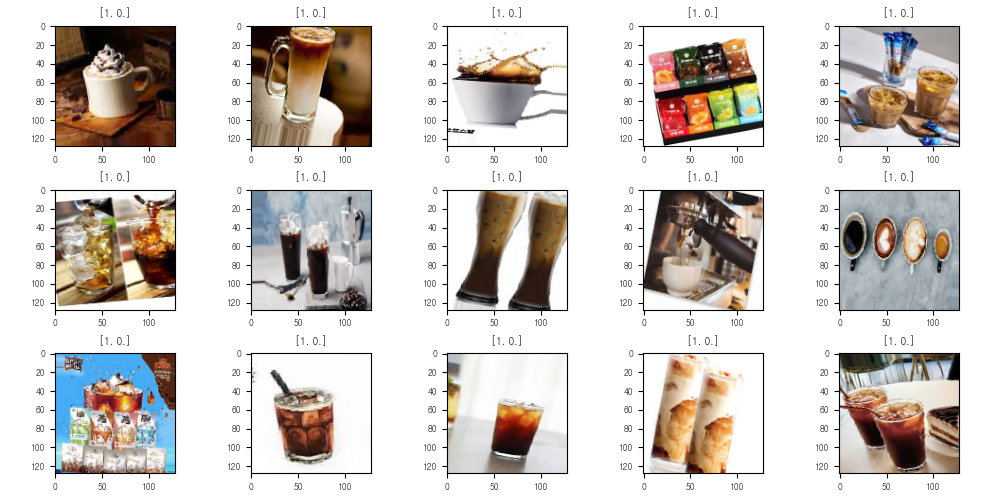

In [97]:
%matplotlib notebook
plt.figure(figsize=(10,5))
for i in range(0,15):  # 15번 생성 
    plt.subplot(3,5,i+1) 
    for x, y in train_generator:
        #print(x[0])  # 컬러 이미지 3장으로 0~1 사이의 픽셀값 생성  
        #print(y[0])  # y[0]~ y14] 까지 사용가능  , 원핫인코딩 
        image = x[0] # 15번 중에서 임의의 x[0]~ x[14] 까지 사용가능         
        plt.imshow(image)
        plt.title(y[0])  # 15번 중에서 임의의 y[0]~ y[14] 까지 사용가능 , 원핫인코딩 
        break
plt.tight_layout()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:120%">  7.2) 준비된 validation 데이터셋을 기반으로 이미지 재생성하기 </span>


<span style="color:blue;  font-weight:bold; font-size:120%">  step 1 : imageDataGenerator 사용하기 </span>


In [98]:
# 검증용 이미지 데이터 생성기 셋팅 (검증용은 원본 그대로 사용하고, rescale=1./255 정규화 처리만 수행)
validate_datagen=ImageDataGenerator(rescale=1./255)  #0~1 사이로 변경    

<span style="color:blue;  font-weight:bold; font-size:120%"> Step 2 : flow_from_dataframe 사용하기 </span>

In [100]:
#flow_from_dataframe 클래스 사용전 현재 검증용 데이터셋 상태 확인

print("-"*20, "validate_df", "-"*20)
print(validate_df)

print("-"*20, "path", "-"*20)
print(path)

print("-"*20, "filename", "-"*20)
print(validate_df.filename)

print("-"*20, "label", "-"*20)
print(validate_df.label)

print("-"*20, "IMAGE_SIZE", "-"*20)
print(IMAGE_SIZE)

print("-"*20, "batch_size ", "-"*20)
print(batch_size)

-------------------- validate_df --------------------
                     filename label
0      nomal_coffee (164).jpg   cat
1      nomal_coffee (319).jpg   cat
2   Spilling coffee (438).jpg   dog
3      nomal_coffee (170).jpg   cat
4       nomal_coffee (71).jpg   cat
..                        ...   ...
93     nomal_coffee (298).jpg   cat
94     nomal_coffee (303).jpg   cat
95     nomal_coffee (391).jpg   cat
96      nomal_coffee (68).jpg   cat
97      nomal_coffee (69).jpg   cat

[98 rows x 2 columns]
-------------------- path --------------------
C:/ai/2021_AI/coffee/normal coffee/
-------------------- filename --------------------
0        nomal_coffee (164).jpg
1        nomal_coffee (319).jpg
2     Spilling coffee (438).jpg
3        nomal_coffee (170).jpg
4         nomal_coffee (71).jpg
                ...            
93       nomal_coffee (298).jpg
94       nomal_coffee (303).jpg
95       nomal_coffee (391).jpg
96        nomal_coffee (68).jpg
97        nomal_coffee (69).jpg
Name:

In [101]:
validation_generator=validate_datagen.flow_from_dataframe(
    validate_df,
    path,
    x_col= "filename",
    y_col= "label",
    target_size = IMAGE_SIZE,
    class_mode = "categorical", #원-핫 인코딩
    batch_size = batch_size)

Found 98 validated image filenames belonging to 2 classes.


# validation 데이터셋에서 랜덤으로 15장을 재구성해서 출력해보기

<IPython.core.display.Javascript object>


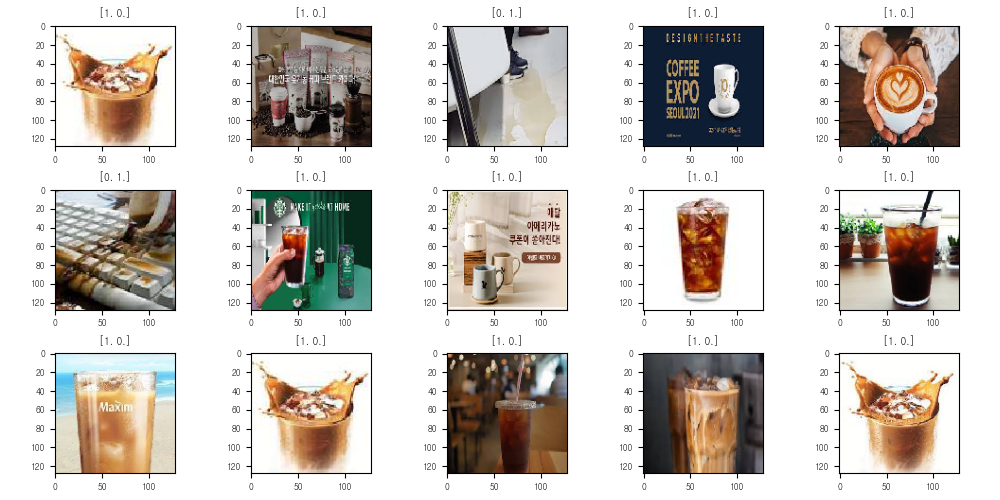

C:\Users\user17\anaconda3\envs\ai\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [102]:
%matplotlib notebook
plt.figure(figsize=(10,5))
for i in range(0,15):  # 15번 생성 
    plt.subplot(3,5,i+1) 
    for x, y in validation_generator:
        #print(x[0])  # 컬러 이미지 3장으로 0~1 사이의 픽셀값 생성 
        #print(y[0])  # y[0]~ y14] 까지 사용가능  , 원핫인코딩 
        image = x[0] # 15번 중에서 임의의 x[0]~ x[14] 까지 사용가능         
        plt.imshow(image)
        plt.title(y[0])  # 15번 중에서 임의의 y[0]~ y[14] 까지 사용가능 , 원핫인코딩 
        break
plt.tight_layout()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:120%">  7.3) training 데이터 중에서 랜덤으로 1개의 샘플 데이터 추출하여 이미지 재생성해보기 </span>


# training 데이터 중에서 랜덤으로 1개의 샘플 데이터 추출하여 이미지 재생성해보기 

<span style="color:blue;  font-weight:bold; font-size:120%">  step 1 : 판다스 구조에서 임의의 이미지 1개 출력하기 </span>


In [103]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_df

,filename,label
0,nomal_coffee (172).jpg,cat


In [104]:
ex_df = example_df.iloc[[0],[0]]
ex_df

,filename
0,nomal_coffee (172).jpg


In [105]:
print(ex_df)
print(type(ex_df))

                 filename
0  nomal_coffee (172).jpg
<class 'pandas.core.frame.DataFrame'>


In [107]:
ex_df = str(ex_df)

In [108]:
ex_df

'                 filename\n0  nomal_coffee (172).jpg'

In [109]:
print(type(ex_df))

<class 'str'>


In [110]:
len(ex_df)

51

In [117]:
ex = str(ex_df[-22:]) # 이부분을 잘 검토할 것
ex

'nomal_coffee (172).jpg'

In [118]:
path

'C:/ai/2021_AI/coffee/normal coffee/'

<IPython.core.display.Javascript object>


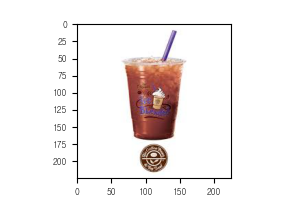

In [119]:
plt.figure(figsize=(3,2))
image = load_img(path+ex)
plt.imshow(image)

<span style="color:blue;  font-weight:bold; font-size:120%">  step 2 : flow_from_dataframe 사용하기 </span>


In [120]:
example_generator = train_datagen.flow_from_dataframe(
                    example_df,
                    path,
                    x_col = "filename",
                    y_col = "label",
                    target_size = IMAGE_SIZE,
                    class_mode = "categorical")

Found 1 validated image filenames belonging to 1 classes.


<IPython.core.display.Javascript object>


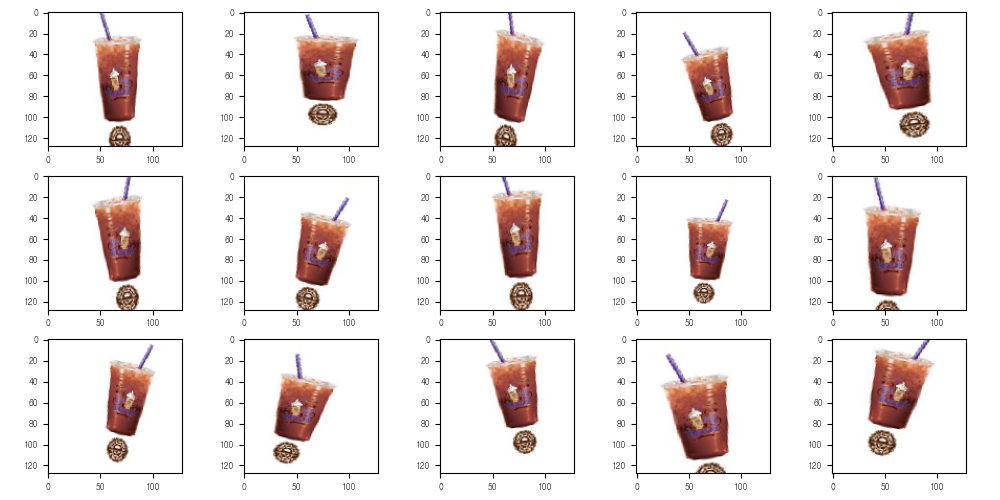

In [121]:
plt.figure(figsize=(10,5))
for i in range(0,15):
    plt.subplot(3,5,i+1)
    for xBatch, yBatch in example_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:120%">  8) fit_generator() 활용한 딥러닝 실행하기 </span>


케라스에서는 모델을 학습시킬 때 주로 fit() 함수를 사용하지만    
제네레이터로 생성된 배치로 학습시킬 경우에는 fit_generator() 함수를 사용한다.  
이 경우, 용량 문제로 재생성된 이미지 파일을 따로 저장하지 않고 바로 fit_generator()사용하여 실행한다.  

ImageDataGenerator라는 제네레이터로 이미지를 담고 있는 배치로 학습시키기 때문에 fit_generator() 함수를 사용한다.

history = model.fit_generator(  
    train_generator,   
    epochs = epochs,   
    steps_per_epoch = total_train//batch_size ,  # total_train(1600개) / batch_size(15개) = 106.6666   
    validation_data=  validation_generator,  
    validation_steps = total_validate//batch_size,  # total_validate(400개) / batch_size(15개) = 26.6666  
    callbacks = callbacks,  
)

train_generator : 훈련데이터셋을 제공할 제네레이터를 지정 
epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정  
steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정 total_train(1600개) / batch_size(15개) = 106.6666 
                  제너레이터로부터 얼마나 많은 샘플을 뽑을 것인지에 해당한다. 

validation_data : 검증데이터셋을 제공할 제네레이터를 지정    
validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수  # total_validate(400개) / batch_size(15개) = 26.6666  
                   제너레이터로부터 얼마나 많은 샘플을 뽑


In [122]:
epochs = 50

history = model.fit_generator(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,  
    validation_data=  validation_generator,
    validation_steps = total_validate//batch_size,  
    callbacks = callbacks,  #콜백함수 사용 
)

# 모델 저장 
model.save_weights("model.h5")

Epoch 1/50
25/26 [===========================>..] - ETA: 0s - loss: 1.2896 - accuracy: 0.5893
Epoch 00001: val_loss improved from inf to 1.69896, saving model to ./coffee_model_save/01-1.2710.hdf5
26/26 [==============================] - 12s 475ms/step - loss: 1.2710 - accuracy: 0.5897 - val_loss: 1.6990 - val_accuracy: 0.8778
Epoch 2/50
25/26 [===========================>..] - ETA: 0s - loss: 0.7795 - accuracy: 0.6480
Epoch 00002: val_loss did not improve from 1.69896
26/26 [==============================] - 12s 448ms/step - loss: 0.7817 - accuracy: 0.6410 - val_loss: 1.8714 - val_accuracy: 0.8778
Epoch 3/50
25/26 [===========================>..] - ETA: 0s - loss: 0.5500 - accuracy: 0.7547
Epoch 00003: val_loss improved from 1.69896 to 1.53977, saving model to ./coffee_model_save/03-0.5419.hdf5
26/26 [==============================] - 12s 462ms/step - loss: 0.5419 - accuracy: 0.7590 - val_loss: 1.5398 - val_accuracy: 0.8778
Epoch 4/50
25/26 [===========================>..] - ETA: 0s -

<span style="color:blue;  font-weight:bold; font-size:120%">  9) 딥러닝 결과를 시각화하기 </span>


<IPython.core.display.Javascript object>


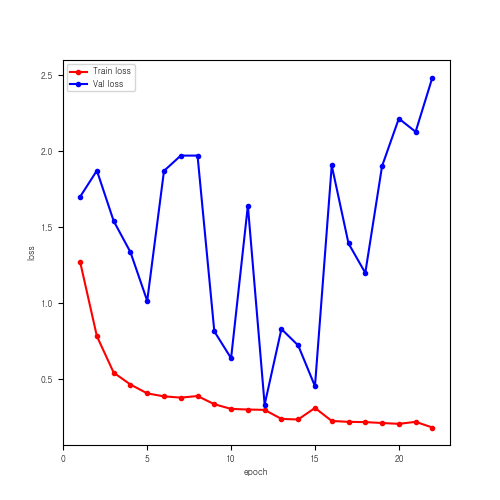

In [123]:
historyDict = history.history

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(5,5))
epo = range(1, len(acc)+1)
plt.plot(epo, loss, marker=".", color='red', label="Train loss")
plt.plot(epo, val_loss, marker=".", color='blue', label="Val loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


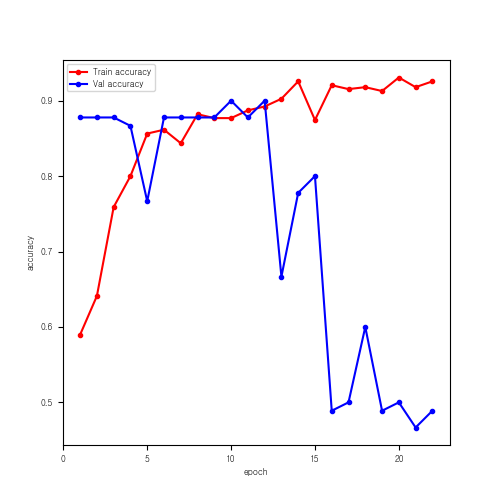

In [124]:
plt.figure(figsize=(5,5))
plt.plot(epo, acc, marker=".", color='red', label="Train accuracy")
plt.plot(epo, val_acc, marker=".", color='blue', label="Val accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<span style="color:blue;  font-weight:bold; font-size:120%">  10) 이미지 테스트 데이터셋 </span>


### 준비된 이미지 테스트 데이터셋

In [125]:
os.getcwd()

'C:\\ai\\2021_AI\\coffee'

In [126]:
test_path = 'C:/ai/2021_AI/coffee/normal coffee/'

In [127]:
filenames = os.listdir(test_path )
print("●len(filenames) :", len(filenames)) 
#print(filenames) 

●len(filenames) : 488


In [130]:
# 테스트 데이터 준비 
test_df=pd.DataFrame( {"filename":filenames} )

In [131]:
test_df

,filename
0,nomal_coffee (1).jpg
1,nomal_coffee (10).jpg
2,nomal_coffee (100).jpg
3,nomal_coffee (101).jpg
4,nomal_coffee (102).jpg
...,...
483,Spilling coffee (484).jpg
484,Spilling coffee (485).jpg
485,Spilling coffee (486).jpg
486,Spilling coffee (487).jpg


In [132]:
test_df.shape

(488, 1)

In [133]:
test_len = test_df.shape[0]

In [134]:
test_len

488

<IPython.core.display.Javascript object>


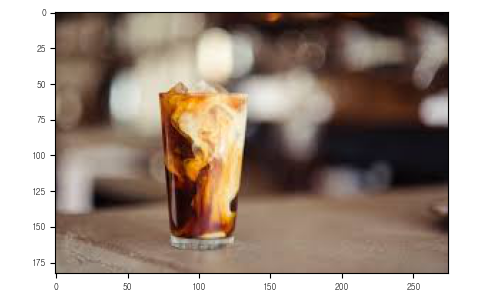

In [135]:
image = load_img(test_path+sample)
plt.figure(figsize=(5,3))
plt.imshow(image)
plt.tight_layout()
plt.show()

### 테스트 이미지 증식을 위한 부분

In [137]:
batch_size

15

In [138]:
#방식 2
# 테스트 이미지 변경하여 사용 
test_datagen=ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,  #0~1 사이로 변경 
        shear_range=0.1,  #반시계방향 
        zoom_range=0.2,   # 확대축소 20%
        horizontal_flip=True,   # 좌우반전 True
        width_shift_range=0.1,    # 좌우이동 10%
        height_shift_range=0.1)    # 상하이동 10%

In [139]:
test_generator=test_datagen.flow_from_dataframe(
    test_df,
    test_path,
    x_col= "filename",
    y_col= None,
    target_size = IMAGE_SIZE,
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

Found 488 validated image filenames.


In [140]:
predict=model.predict_generator(test_generator,                                 
                                callbacks=callbacks)

In [141]:
print("테스트 이미지 개수 : ", len(predict))
print("테스트 결과  ")
print(predict)

테스트 이미지 개수 :  488
테스트 결과  
[[2.81238258e-01 7.18761742e-01]
 [2.88525829e-04 9.99711454e-01]
 [8.46390307e-01 1.53609738e-01]
 [1.02946544e-02 9.89705384e-01]
 [1.21611971e-02 9.87838864e-01]
 [1.00000000e+00 9.82554149e-10]
 [7.18341209e-04 9.99281704e-01]
 [5.81598561e-03 9.94184077e-01]
 [6.32914191e-04 9.99367058e-01]
 [8.53419024e-03 9.91465807e-01]
 [1.08874090e-01 8.91125977e-01]
 [8.25711936e-02 9.17428851e-01]
 [1.18587988e-04 9.99881387e-01]
 [5.58921918e-02 9.44107771e-01]
 [8.13949704e-01 1.86050251e-01]
 [9.99999881e-01 1.35006403e-07]
 [1.54311145e-02 9.84568954e-01]
 [2.77803600e-04 9.99722183e-01]
 [9.99517679e-01 4.82373638e-04]
 [5.12206495e-01 4.87793475e-01]
 [1.24440659e-04 9.99875546e-01]
 [1.15040138e-01 8.84959877e-01]
 [4.57070470e-02 9.54292953e-01]
 [6.38076365e-01 3.61923635e-01]
 [9.98930633e-01 1.06933003e-03]
 [8.16573560e-01 1.83426440e-01]
 [1.40782863e-01 8.59217107e-01]
 [4.33746427e-02 9.56625402e-01]
 [1.15282414e-02 9.88471746e-01]
 [1.11922855e-03

In [142]:
result = np.argmax(predict, axis=1)

In [143]:
for i in range(len(predict)):
    if result[i] == 0 :
        print(i, "번째 이미지 예측 결과 : ", result[i], ", normal coffee")
    else:
        print(i, "번째 이미지 예측 결과 : ", result[i], ", spilling coffee")

0 번째 이미지 예측 결과 :  1 , spilling coffee
1 번째 이미지 예측 결과 :  1 , spilling coffee
2 번째 이미지 예측 결과 :  0 , normal coffee
3 번째 이미지 예측 결과 :  1 , spilling coffee
4 번째 이미지 예측 결과 :  1 , spilling coffee
5 번째 이미지 예측 결과 :  0 , normal coffee
6 번째 이미지 예측 결과 :  1 , spilling coffee
7 번째 이미지 예측 결과 :  1 , spilling coffee
8 번째 이미지 예측 결과 :  1 , spilling coffee
9 번째 이미지 예측 결과 :  1 , spilling coffee
10 번째 이미지 예측 결과 :  1 , spilling coffee
11 번째 이미지 예측 결과 :  1 , spilling coffee
12 번째 이미지 예측 결과 :  1 , spilling coffee
13 번째 이미지 예측 결과 :  1 , spilling coffee
14 번째 이미지 예측 결과 :  0 , normal coffee
15 번째 이미지 예측 결과 :  0 , normal coffee
16 번째 이미지 예측 결과 :  1 , spilling coffee
17 번째 이미지 예측 결과 :  1 , spilling coffee
18 번째 이미지 예측 결과 :  0 , normal coffee
19 번째 이미지 예측 결과 :  0 , normal coffee
20 번째 이미지 예측 결과 :  1 , spilling coffee
21 번째 이미지 예측 결과 :  1 , spilling coffee
22 번째 이미지 예측 결과 :  1 , spilling coffee
23 번째 이미지 예측 결과 :  0 , normal coffee
24 번째 이미지 예측 결과 :  0 , normal coffee
25 번째 이미지 예측 결과 :  0 , normal coffee
26 번째 이미지 예측 결

# 이미지 인식 테스트 

In [144]:
print(test_len)
print(batch_size)

488
15


In [145]:
predict=model.predict_generator(test_generator,     
                                steps=10, # 이 부분이 추가된 방식
                                callbacks=callbacks)

In [146]:
print("테스트 이미지 개수 : ", len(predict))

테스트 이미지 개수 :  150


In [148]:
print("테스트 이미지 개수 : ", len(predict))
print("테스트 결과  ")
print(predict)

테스트 이미지 개수 :  150
테스트 결과  
[[5.59985399e-01 4.40014660e-01]
 [5.18230197e-04 9.99481857e-01]
 [9.26982462e-01 7.30176121e-02]
 [3.67869139e-02 9.63213027e-01]
 [6.36067055e-03 9.93639290e-01]
 [1.00000000e+00 1.33030182e-08]
 [2.76407762e-03 9.97235954e-01]
 [1.07782399e-02 9.89221692e-01]
 [5.31097641e-04 9.99468863e-01]
 [1.75607309e-01 8.24392736e-01]
 [3.37207973e-01 6.62792027e-01]
 [1.61168277e-02 9.83883202e-01]
 [2.49676614e-05 9.99975085e-01]
 [8.46285820e-02 9.15371358e-01]
 [9.67264056e-01 3.27359848e-02]
 [9.99999881e-01 6.21903880e-08]
 [1.55216397e-03 9.98447776e-01]
 [8.93054123e-04 9.99106944e-01]
 [9.99998808e-01 1.23134669e-06]
 [6.98232576e-02 9.30176735e-01]
 [8.48753727e-04 9.99151230e-01]
 [5.95345572e-02 9.40465510e-01]
 [1.44779757e-02 9.85522032e-01]
 [9.91865695e-01 8.13433342e-03]
 [9.78339791e-01 2.16602534e-02]
 [8.09539735e-01 1.90460250e-01]
 [1.49035841e-01 8.50964129e-01]
 [4.50678542e-03 9.95493174e-01]
 [5.45528455e-05 9.99945402e-01]
 [4.85244632e-01

In [149]:
result = np.argmax(predict, axis=1)

In [150]:
result

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [152]:
for i in range(len(predict)) :
    if result[i] == 0 :
        print(i, "번째 이미지 예측 결과 : ", result[i], ", normal coffee")
    else:
        print(i, "번째 이미지 예측 결과 : ", result[i], ", spilling coffee")

0 번째 이미지 예측 결과 :  0 , normal coffee
1 번째 이미지 예측 결과 :  1 , spilling coffee
2 번째 이미지 예측 결과 :  0 , normal coffee
3 번째 이미지 예측 결과 :  1 , spilling coffee
4 번째 이미지 예측 결과 :  1 , spilling coffee
5 번째 이미지 예측 결과 :  0 , normal coffee
6 번째 이미지 예측 결과 :  1 , spilling coffee
7 번째 이미지 예측 결과 :  1 , spilling coffee
8 번째 이미지 예측 결과 :  1 , spilling coffee
9 번째 이미지 예측 결과 :  1 , spilling coffee
10 번째 이미지 예측 결과 :  1 , spilling coffee
11 번째 이미지 예측 결과 :  1 , spilling coffee
12 번째 이미지 예측 결과 :  1 , spilling coffee
13 번째 이미지 예측 결과 :  1 , spilling coffee
14 번째 이미지 예측 결과 :  0 , normal coffee
15 번째 이미지 예측 결과 :  0 , normal coffee
16 번째 이미지 예측 결과 :  1 , spilling coffee
17 번째 이미지 예측 결과 :  1 , spilling coffee
18 번째 이미지 예측 결과 :  0 , normal coffee
19 번째 이미지 예측 결과 :  1 , spilling coffee
20 번째 이미지 예측 결과 :  1 , spilling coffee
21 번째 이미지 예측 결과 :  1 , spilling coffee
22 번째 이미지 예측 결과 :  1 , spilling coffee
23 번째 이미지 예측 결과 :  0 , normal coffee
24 번째 이미지 예측 결과 :  0 , normal coffee
25 번째 이미지 예측 결과 :  0 , normal coffee
26 번째 이미지 예측 결

### 테스트 이미지 시각화해서 출력해보기

In [153]:
predict=model.predict_generator(test_generator, 
                                callbacks=callbacks)
                                
test_df['category']=np.argmax(predict, axis=1)

In [154]:
test_df

,filename,category
0,nomal_coffee (1).jpg,1
1,nomal_coffee (10).jpg,1
2,nomal_coffee (100).jpg,1
3,nomal_coffee (101).jpg,1
4,nomal_coffee (102).jpg,1
...,...,...
483,Spilling coffee (484).jpg,1
484,Spilling coffee (485).jpg,1
485,Spilling coffee (486).jpg,0
486,Spilling coffee (487).jpg,1


In [158]:
test_df['category'] = test_df['category'].replace({0:'normal coffee', 1:'spilling coffee'})
pred_df = test_df.sample(n=1).reset_index(drop=True) # 순차적 인덱스 출력
pred_df

,filename,category
0,nomal_coffee (187).jpg,spilling coffee


In [159]:
test_sample = list(pred_df.filename)
print(test_sample)

['nomal_coffee (187).jpg']


In [160]:
type(test_sample)

list

In [161]:
sample = ""
for test in test_sample:
    sample += test

In [162]:
sample   #테스트 샘플 파일명 출력 

'nomal_coffee (187).jpg'

In [164]:
type(sample)

str

In [165]:
test_path

'C:/ai/2021_AI/coffee/normal coffee/'

<IPython.core.display.Javascript object>


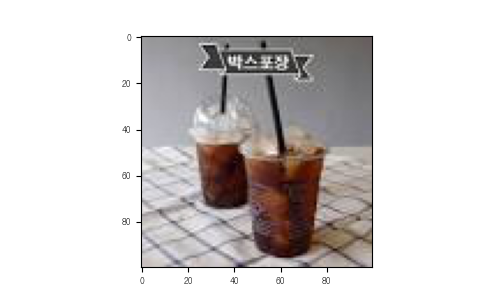

In [163]:
image = load_img(test_path+sample)
plt.figure(figsize = (5,3))
plt.imshow(image)